In [90]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv', index_col='file')
df = df[~df.index.isin(['vmlinux.bc'])]
# df = df[~df.index.isin(['vmlinux.bc', 'php.bc', 'git.bc'])]
# df = df[df.index.isin(['vmlinux.bc', 'php.bc', 'git.bc', 'postgres.bc'])]
df

,ptagpu total,ptagpu analysis,svf init,cuda init + dealloc,update_pts kernel,main kernel,thrust sort,store kernel,async gep+ind,svf geps,...,a100 ptagpu analysis,a100 svf init,a100 cuda init + dealloc,a100 update_pts kernel,a100 main kernel,a100 thrust sort,a100 store kernel,a100 async gep+ind,a100 svf geps,a100 svf inds
file,,,,,,,,,,,,,,,,,,,,,
bash.bc,15489.00,12155.00,366.51500,2489.389,1129.063,1.324698e+03,743.670,8.589320e+02,5190.693,4845.0800,...,9402.316,316.58900,3339.273,955.132,1258.228,103.923,824.671,3404.405,3807.10000,971.248000
bison.bc,9837.06,8036.01,214.35700,1650.840,830.177,2.340460e+02,675.748,5.463300e+01,4317.114,1917.6800,...,5815.973,181.42500,3397.507,657.559,203.553,92.256,41.323,2941.927,1411.87000,1451.220000
diff.bc,4231.58,3634.95,66.94580,2065.479,103.057,3.312000e+01,379.843,2.359100e+01,953.283,511.9540,...,2721.582,53.19680,3119.867,100.198,29.448,73.122,13.813,379.511,296.18800,32.846600
git.bc,4690000.00,4680000.00,2190.25000,17095.315,70148.000,3.968158e+06,11743.372,6.837329e+04,538454.710,498296.0000,...,855085.000,1489.25000,2852.620,31480.079,350891.929,4856.937,30923.576,431554.218,377337.00000,106563.000000
htop.bc,5275.51,4633.51,68.42510,2053.573,229.714,2.029550e+02,433.321,4.109200e+01,1587.968,777.8040,...,3474.304,58.77080,3238.629,212.349,189.568,74.528,20.536,852.136,485.82900,353.452000
httpd.bc,6414.69,4308.79,309.35400,1481.509,303.996,4.260500e+01,511.057,8.219000e+00,1637.408,1065.9300,...,2932.561,233.17300,3125.778,258.309,39.757,57.139,5.049,848.704,740.77400,53.462600
nano.ll,1751.01,1687.37,7.73208,1533.113,1.829,3.040000e+00,45.140,1.057000e+00,94.275,10.0379,...,1573.306,5.65595,3163.307,2.024,4.073,8.778,0.786,18.179,7.08039,0.216466
perl.bc,45093.40,38385.80,775.91500,2939.635,3457.350,6.125819e+03,767.334,2.751206e+03,21457.059,18962.7000,...,35132.236,644.41700,3277.899,3452.222,6873.348,164.523,2906.182,18027.103,18257.40000,5479.080000
php.bc,65000000.00,64900000.00,2809.67000,20928.407,193679.543,5.378310e+07,12298.489,1.073274e+07,187398.213,467306.0000,...,474282.000,2561.20000,3815.678,32016.810,184075.139,2797.468,49062.434,198397.500,271246.00000,122039.000000


In [91]:
df['speedup'] = df['wavediff total']/df['ptagpu total']
df['a100 speedup'] = df['wavediff total']/df['a100 ptagpu total']

df['a100 speedup']

file
bash.bc            1.235847
bison.bc           2.497203
diff.bc            0.444550
git.bc             0.641841
htop.bc            0.721199
httpd.bc           1.127297
nano.ll            0.053760
perl.bc            2.469035
php.bc             1.291172
postgres.bc        3.436562
python.bc          3.106615
redis-server.bc    0.982908
vim.bc             4.248365
vmlinux-tiny.bc    0.671832
zstd.bc            1.129471
Name: a100 speedup, dtype: float64

In [3]:
df['diff'] = df['wavediff total'] - df['ptagpu total']
df['diff']

file
bash.bc               733.113
bison.bc             9140.316
diff.bc             -2762.524
htop.bc             -2362.817
httpd.bc            -1093.059
nano.ll             -1663.572
perl.bc             58245.424
postgres.bc        531828.718
python.bc          332866.479
redis-server.bc     -2913.356
vim.bc             784367.525
vmlinux-tiny.bc    -96835.303
zstd.bc             -2109.386
Name: diff, dtype: float64

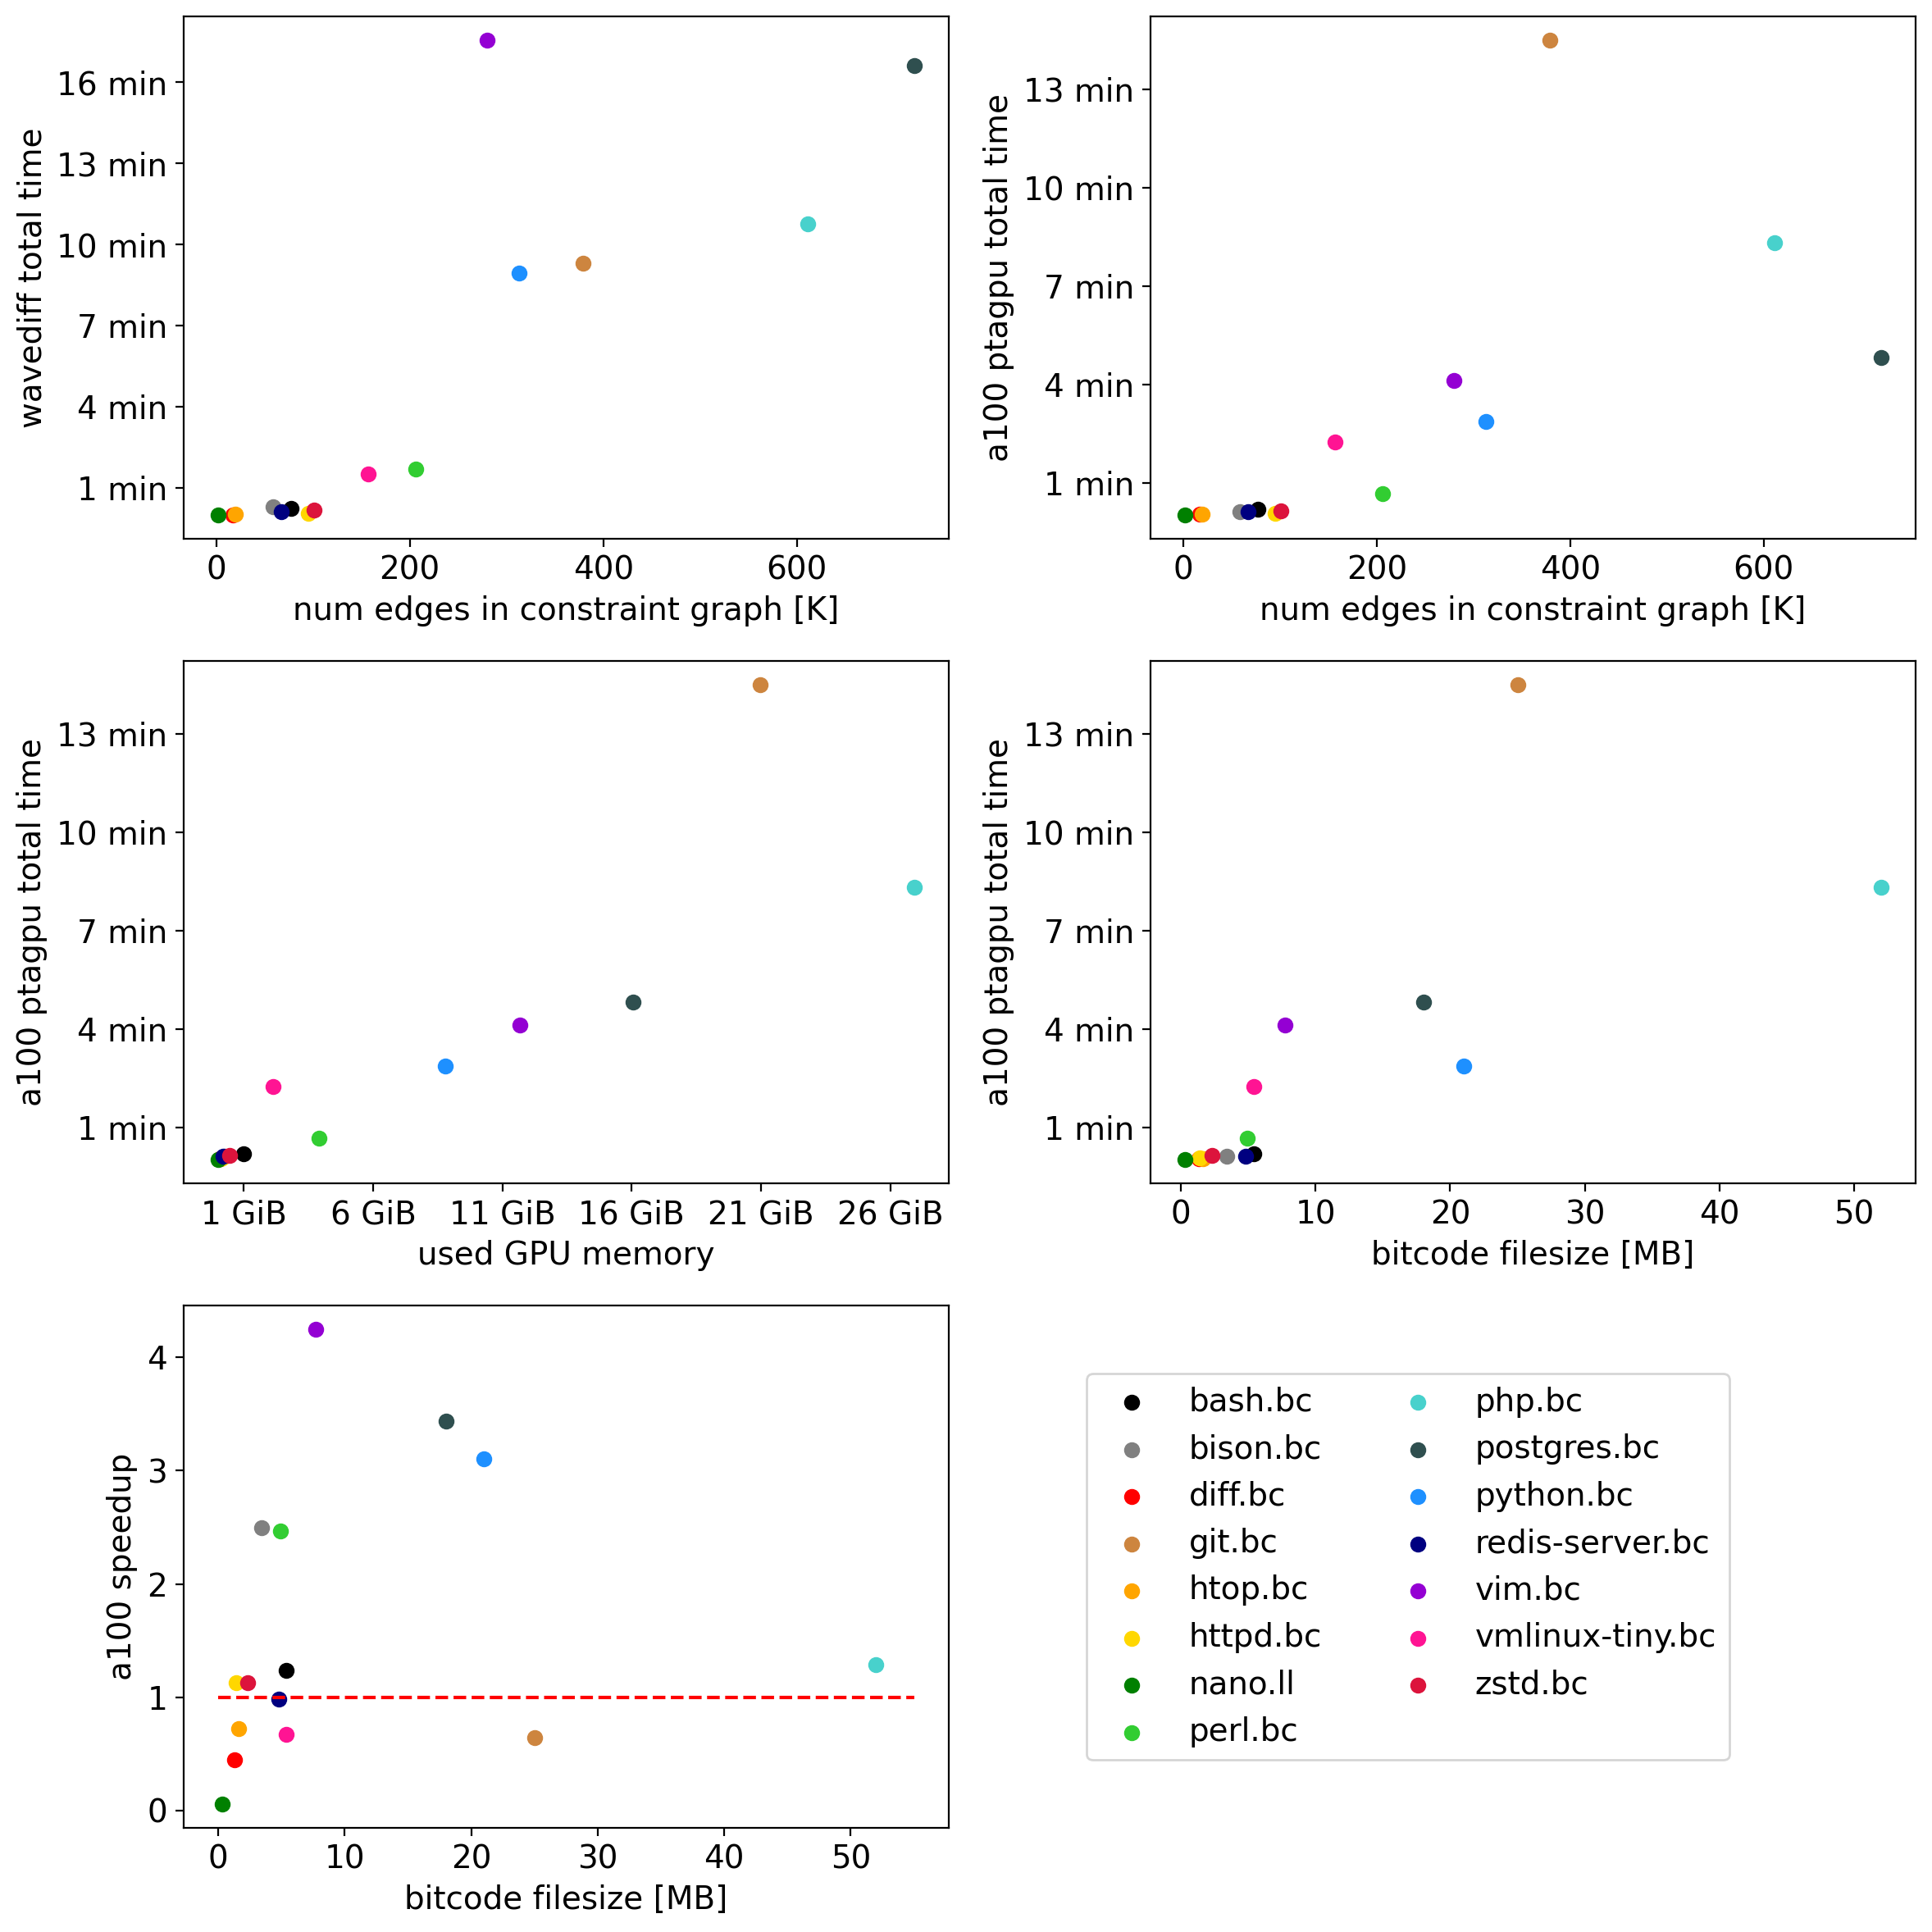

In [92]:
# df.plot.scatter(x='filesize', y=df.columns[0])
from matplotlib import colors

color_list = list(colors.CSS4_COLORS)
color_list = ['black',
 'gray',
 'red',
 'peru',
 'orange',
 'gold',
 'green',
 'limegreen',
 'mediumturquoise',
 'darkslategray',
 'dodgerblue',
 'navy',
 'darkviolet',
 'deeppink',
 'crimson',
 'maroon']



fig = plt.figure(figsize=(12,12))

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

yticks = [60000*i for i in range(1, 20, 3)]
ylabels = [f"{i} min" for i in range(1, 20, 3)]


# axes[1,1].ticklabel_format(style='sci')
plt.gcf().set_dpi(200)

ax1 = fig.add_subplot(3,2,1)
ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
ax1.set_xlabel('num edges in constraint graph [K]')
ax1.set_ylabel('wavediff total time')
# df.plot.scatter(ax=axes[0,0], x='num edges', y='wavediff total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax1.scatter(x=row['num edges'], y=row['wavediff total'], label=ticker, c=color_list[i])

ax2 = fig.add_subplot(3,2,2)
ax2.set_yticks(yticks)
ax2.set_yticklabels(ylabels)
ax2.set_xlabel('num edges in constraint graph [K]')
ax2.set_ylabel('a100 ptagpu total time')
# df.plot.scatter(ax=axes[0,1], x='num edges', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax2.scatter(x=row['num edges'], y=row['a100 ptagpu total'], label=ticker, c=color_list[i])

ax3 = fig.add_subplot(3,2,3)
ax3.set_xticks([1024*i for i in range(1,200, 5)])
ax3.set_xticklabels([f"{i} GiB" for i in range(1,200, 5)])
ax3.set_yticks(yticks)
ax3.set_yticklabels(ylabels)
ax3.set_xlabel('used GPU memory')
ax3.set_ylabel('a100 ptagpu total time')
# df.plot.scatter(ax=axes[1,0], x='used GPU memory MiB', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax3.scatter(x=row['used GPU memory MiB'], y=row['a100 ptagpu total'], label=ticker, c=color_list[i])

ax4 = fig.add_subplot(3,2,4)
ax4.set_yticks(yticks)
ax4.set_yticklabels(ylabels)
ax4.set_xlabel('bitcode filesize [MB]')
ax4.set_ylabel('a100 ptagpu total time')
# df.plot.scatter(ax=axes[1,1], x='bitcode filesize MB', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax4.scatter(x=row['bitcode filesize MB'], y=row['a100 ptagpu total'], label=ticker, c=color_list[i])

ax5 = fig.add_subplot(3,2,5)
# ax5.set_yticks(yticks)
# ax5.set_yticklabels(ylabels)
ax5.set_xlabel('bitcode filesize [MB]')
ax5.set_ylabel('a100 speedup')
# df.plot.scatter(ax=axes[2,0], x='bitcode filesize MB', y='a100 speedup', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax5.scatter(x=row['bitcode filesize MB'], y=row['a100 speedup'], label=ticker, c=color_list[i])

ax5.plot([0,55],[1,1], '--', c='r')
# df.plot.scatter(ax=axes[2,1], x='bitcode filesize MB', y='diff', c=color_list[0:len(df.index)])
# axes[2,1].set_yscale("log")
fig.tight_layout()

ax5.legend(bbox_to_anchor=(1.6, 0.5), loc='center', borderaxespad=0, ncol=2)

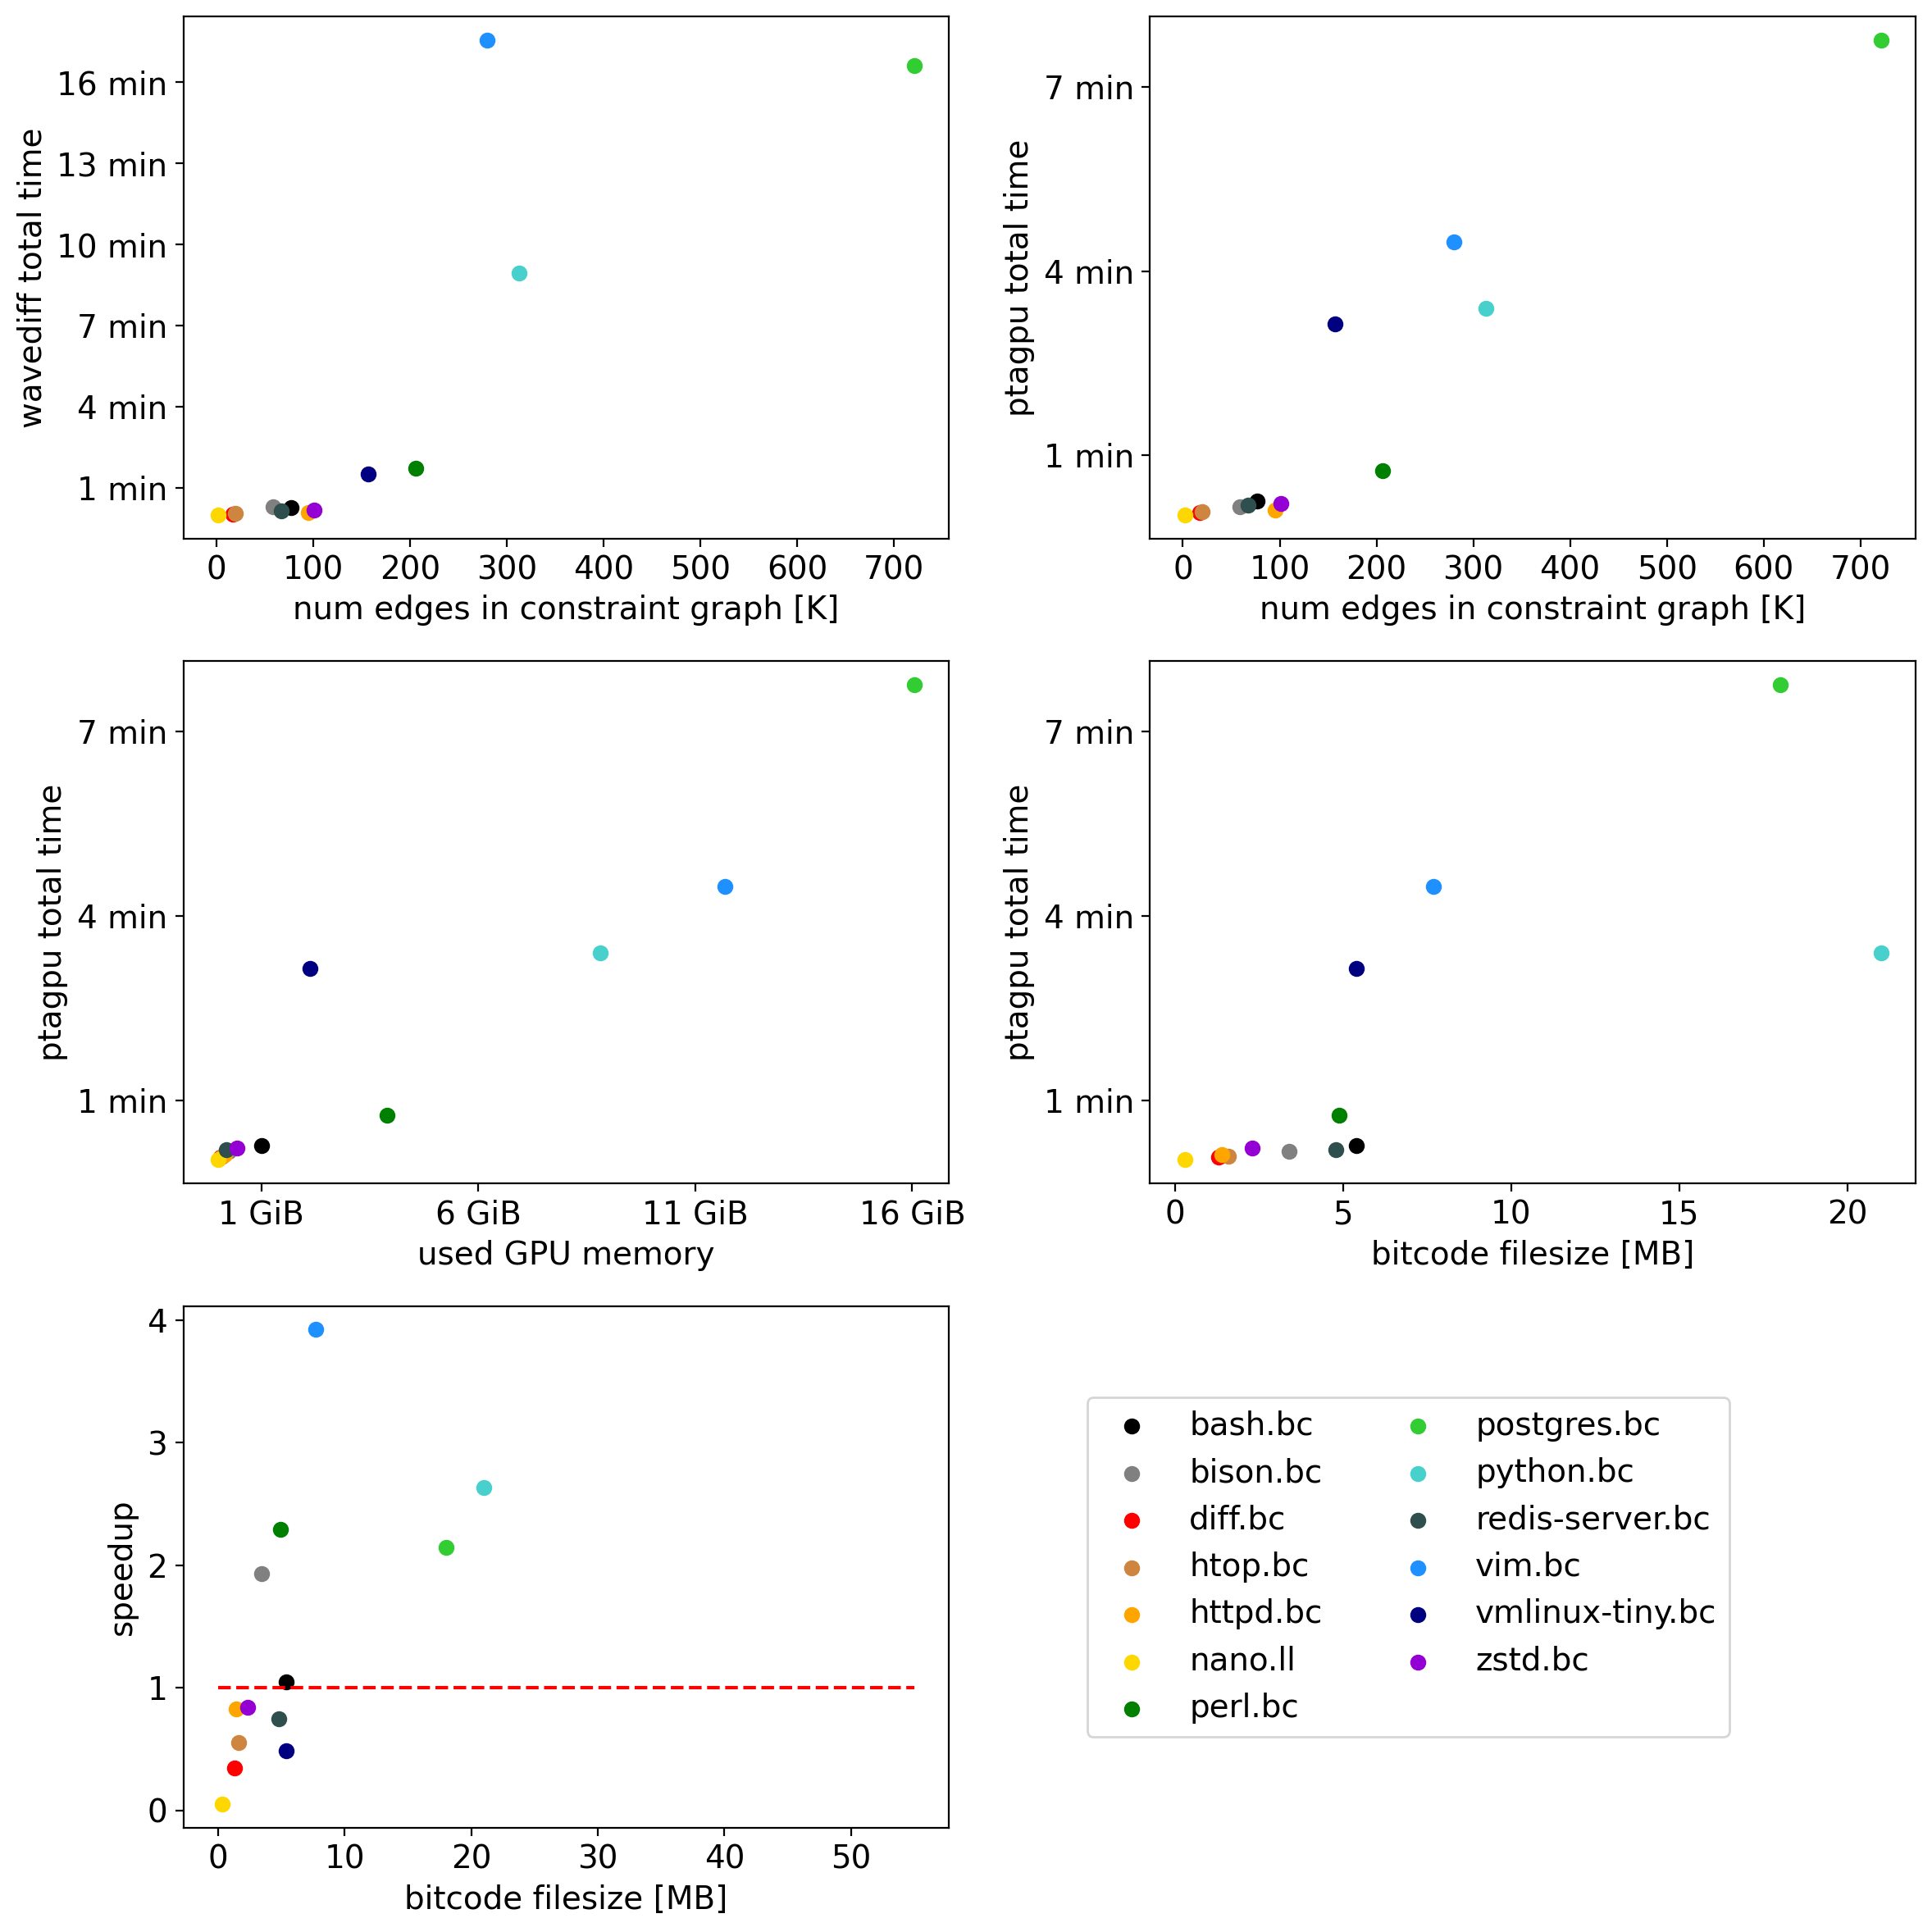

In [89]:
# df.plot.scatter(x='filesize', y=df.columns[0])
from matplotlib import colors

# remove overflowing data
df = df[~df.index.isin(['vmlinux.bc', 'php.bc', 'git.bc'])]

color_list = list(colors.CSS4_COLORS)
color_list = ['black',
 'gray',
 'red',
 'peru',
 'orange',
 'gold',
 'green',
 'limegreen',
 'mediumturquoise',
 'darkslategray',
 'dodgerblue',
 'navy',
 'darkviolet',
 'deeppink',
 'crimson',
 'maroon']



fig = plt.figure(figsize=(12,12))

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

yticks = [60000*i for i in range(1, 20, 3)]
ylabels = [f"{i} min" for i in range(1, 20, 3)]


# axes[1,1].ticklabel_format(style='sci')
plt.gcf().set_dpi(200)

ax1 = fig.add_subplot(3,2,1)
ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
ax1.set_xlabel('num edges in constraint graph [K]')
ax1.set_ylabel('wavediff total time')
# df.plot.scatter(ax=axes[0,0], x='num edges', y='wavediff total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax1.scatter(x=row['num edges'], y=row['wavediff total'], label=ticker, c=color_list[i])

ax2 = fig.add_subplot(3,2,2)
ax2.set_yticks(yticks)
ax2.set_yticklabels(ylabels)
ax2.set_xlabel('num edges in constraint graph [K]')
ax2.set_ylabel('ptagpu total time')
# df.plot.scatter(ax=axes[0,1], x='num edges', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax2.scatter(x=row['num edges'], y=row['ptagpu total'], label=ticker, c=color_list[i])

ax3 = fig.add_subplot(3,2,3)
ax3.set_xticks([1024*i for i in range(1,200, 5)])
ax3.set_xticklabels([f"{i} GiB" for i in range(1,200, 5)])
ax3.set_yticks(yticks)
ax3.set_yticklabels(ylabels)
ax3.set_xlabel('used GPU memory')
ax3.set_ylabel('ptagpu total time')
# df.plot.scatter(ax=axes[1,0], x='used GPU memory MiB', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax3.scatter(x=row['used GPU memory MiB'], y=row['ptagpu total'], label=ticker, c=color_list[i])

ax4 = fig.add_subplot(3,2,4)
ax4.set_yticks(yticks)
ax4.set_yticklabels(ylabels)
ax4.set_xlabel('bitcode filesize [MB]')
ax4.set_ylabel('ptagpu total time')
# df.plot.scatter(ax=axes[1,1], x='bitcode filesize MB', y='a100 ptagpu total', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax4.scatter(x=row['bitcode filesize MB'], y=row['ptagpu total'], label=ticker, c=color_list[i])

ax5 = fig.add_subplot(3,2,5)
# ax5.set_yticks(yticks)
# ax5.set_yticklabels(ylabels)
ax5.set_xlabel('bitcode filesize [MB]')
ax5.set_ylabel('speedup')
# df.plot.scatter(ax=axes[2,0], x='bitcode filesize MB', y='a100 speedup', c=color_list[0:len(df.index)])
for i,(ticker,row) in enumerate(df.iterrows()):
  ax5.scatter(x=row['bitcode filesize MB'], y=row['speedup'], label=ticker, c=color_list[i])

ax5.plot([0,55],[1,1], '--', c='r')
# df.plot.scatter(ax=axes[2,1], x='bitcode filesize MB', y='diff', c=color_list[0:len(df.index)])
# axes[2,1].set_yscale("log")
fig.tight_layout()

ax5.legend(bbox_to_anchor=(1.6, 0.5), loc='center', borderaxespad=0, ncol=2)

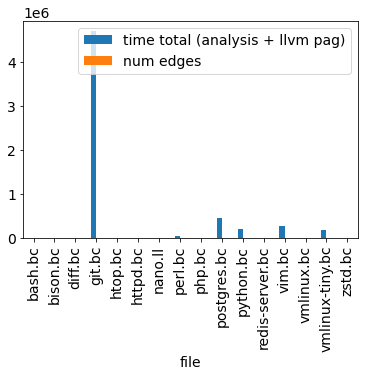

In [ ]:
df[[df.columns[0],df.columns[-3]]].plot.bar()

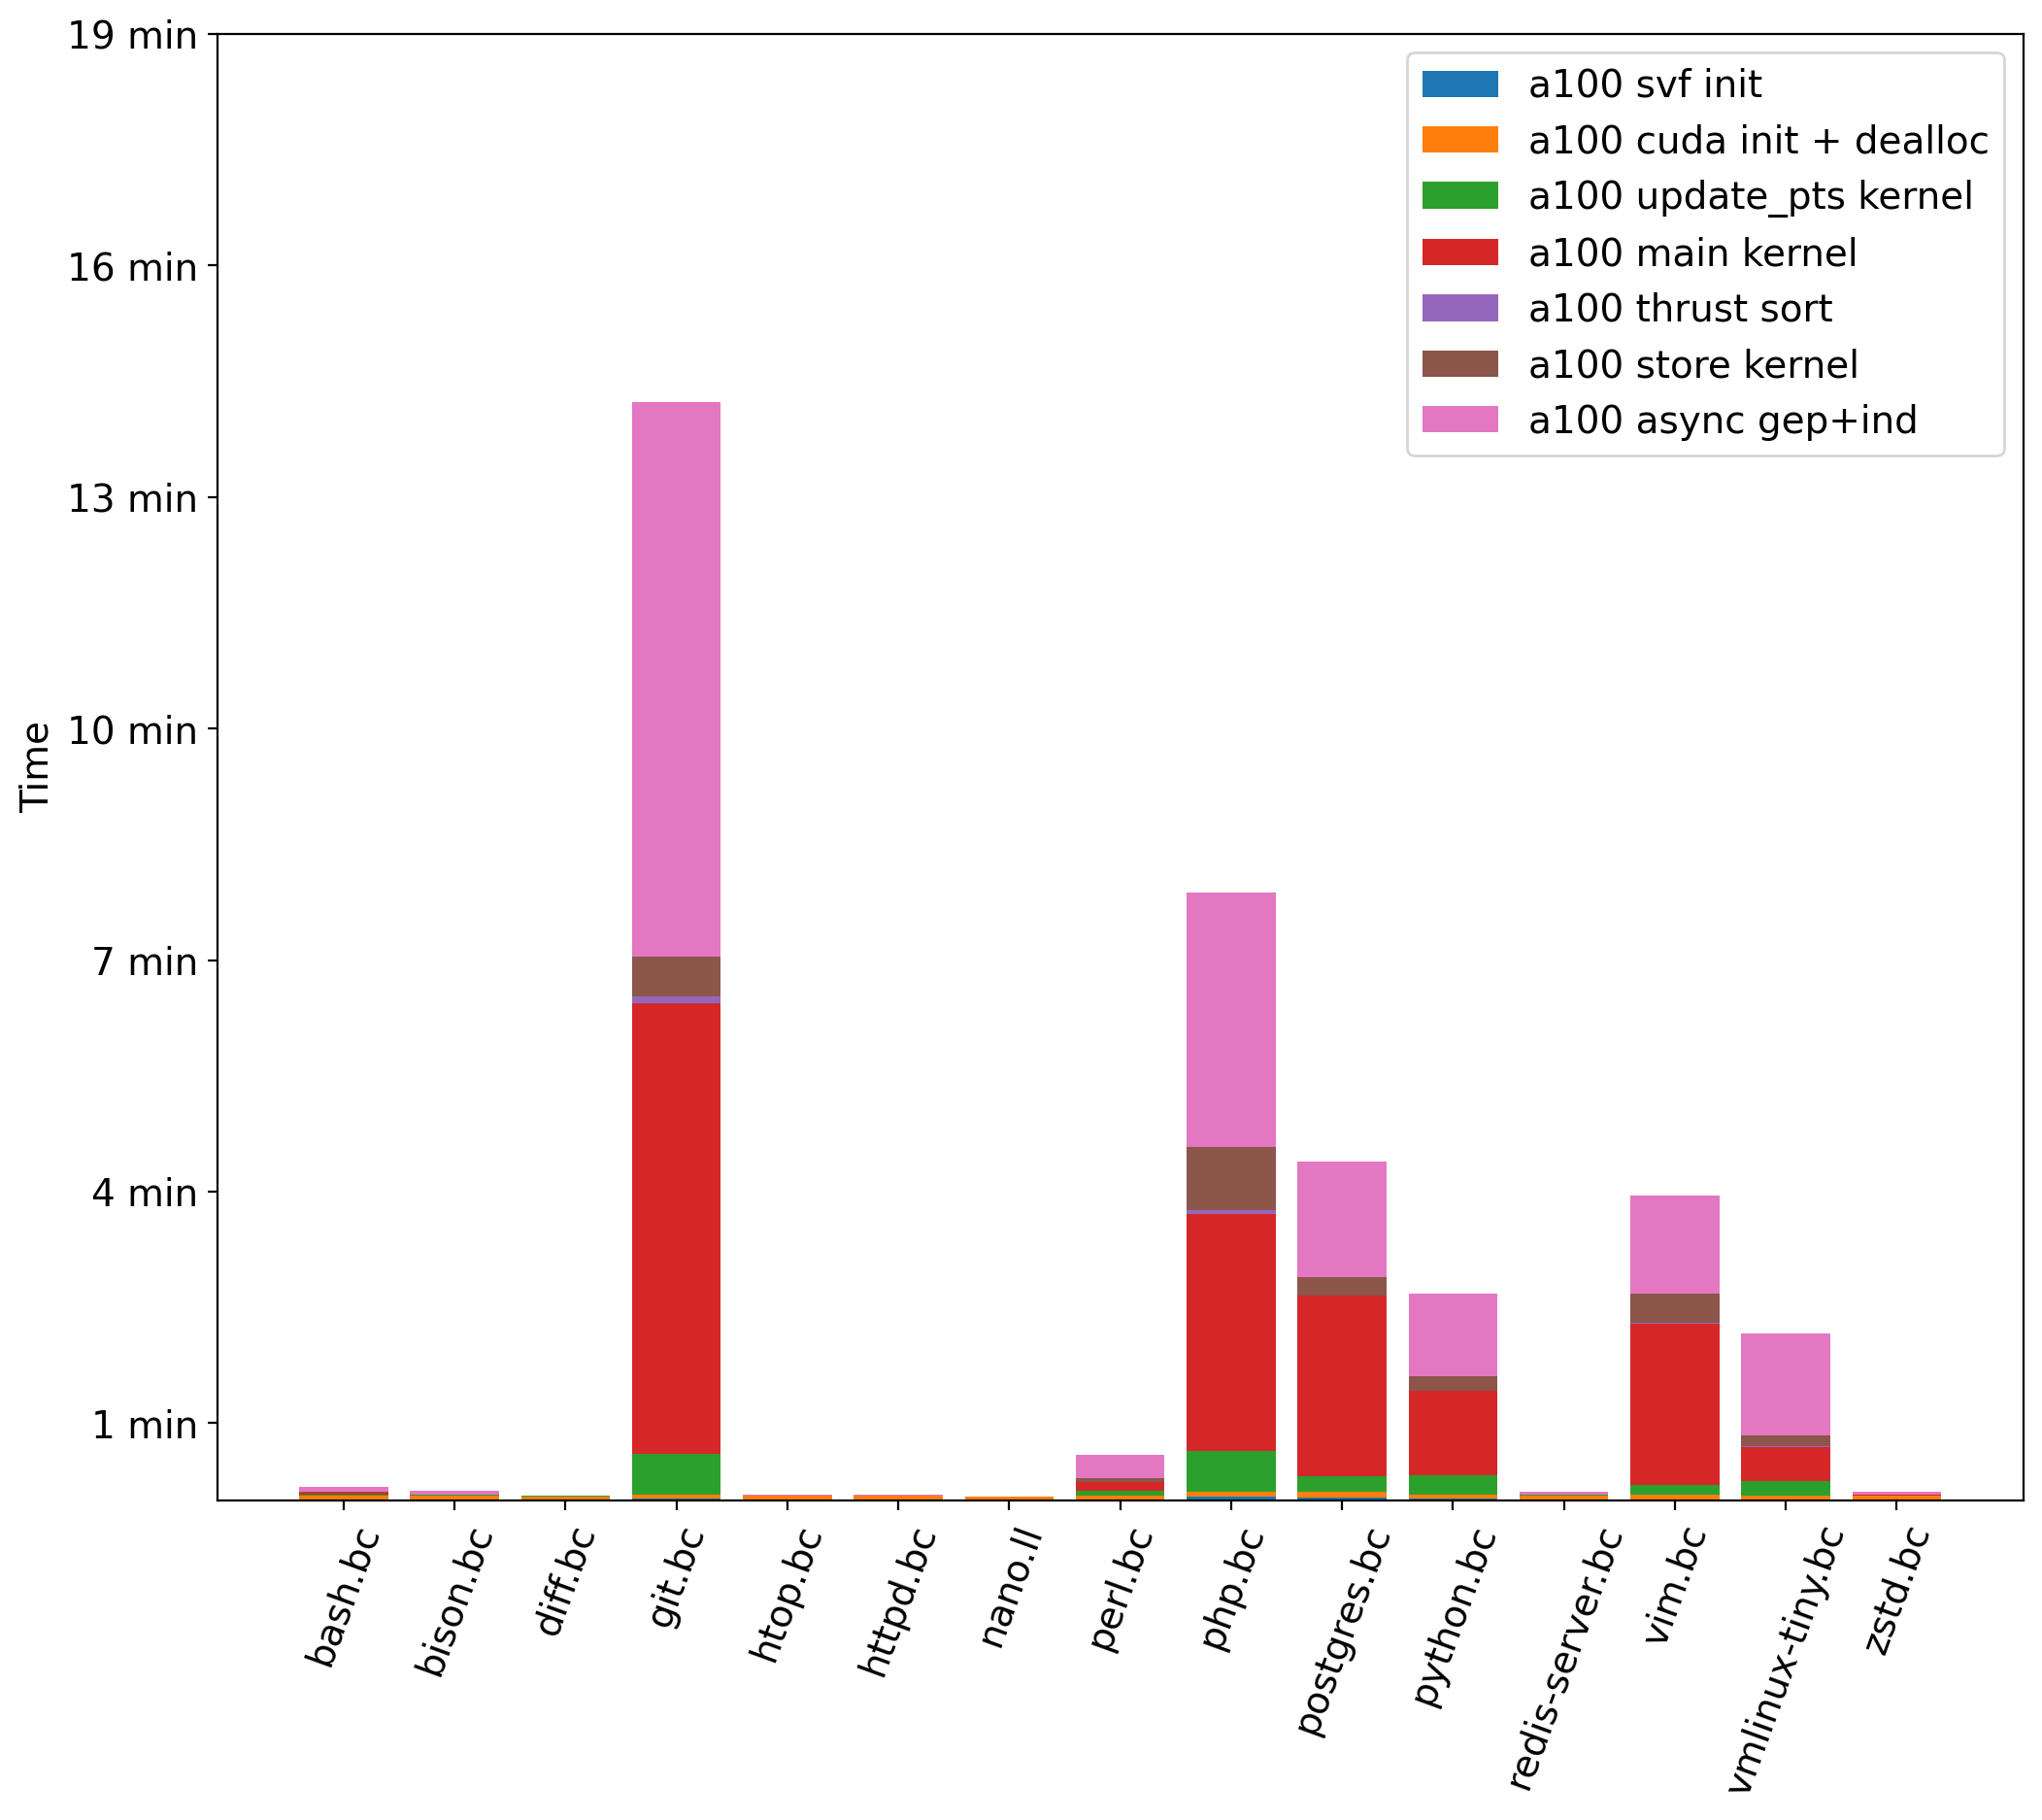

In [57]:
plt.rc('font', size=14)
cumval=0
fig = plt.figure(figsize=(12,10))
plt.gcf().set_dpi(200)
# df_s = df.sort_values(by = 'a100 ptagpu total')
df_s = df
for col in df_s[df_s.columns[-10:-3]]:
    plt.bar(df_s.index, df_s[col], bottom=cumval, label=col)
    cumval = cumval+df_s[col]

_ = plt.xticks(rotation=70)
_ = plt.legend(fontsize=14)
_ = plt.ylabel('Time')
# _ = plt.yticks([120000, 240000, 360000], ["2min", "4min", "6min"])

# _ = plt.yticks([3600000*i for i in range(0, 20, 3)], [f"{i}h" for i in range(0, 20, 3)])
_ = plt.yticks([60000*i for i in range(1, 20, 3)], [f"{i} min" for i in range(1, 20, 3)])